<a href="https://colab.research.google.com/github/Alicia-Hong/100-pandas-puzzles/blob/master/Training_with_Neural_Prophet_on_COVID_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training on COVID Data Set
# Harrisburg University PhD Comprehensive Exam 2021
This code implementation aims to predict COVID-19 outbreak trend and expansion rate across different countries. Using time series analysis with NeuralProphet Model and Libraries, this examine autocorrelations of overall trend (regardless of countries) and evaluate the model performance result.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git 
    
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
# set_log_level("ERROR")

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-zfktds2z
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-zfktds2z
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 155 kB 7.7 MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.2.9-py3-none-any.whl size=67423 sha256=bae32160626392f3410aeb33fe89576003a2d27b687498221c863fdb63c6512f
  Stored in directory: /tmp/pip-ephem-wheel-cache-pokuhpi0/wheels/bc/d0/dd/f2b1133865669ed9b544f6f1ff9155aedf57c9dbfc72ce211e
Successfully built neuralprophet
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [27]:
# data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
data_location = '/content/drive/MyDrive/HU/ANLY 565/R script'


sf_load_df = pd.read_excel(data_location +  '/Copy of covid.xlsx')

In [25]:
sf_load_df.head(3)

,ds,y
0,2020-01-22 00:00:00,1
1,2020-01-23 00:00:00,2
2,2020-01-24 00:00:00,5


### Generic forecast: Time-based features only
In this first section, we will train a model with time-features only like we would do with Facebook Prophet.

In [28]:
m = NeuralProphet(
    weekly_seasonality=6,
    daily_seasonality=10,
    trend_reg=1,
    learning_rate=0.03,
)
df_train, df_test = m.split_df(sf_load_df, freq='H', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='H', validation_df=df_test, plot_live_loss=True)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 304
  0%|          | 0/304 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[304/304]: 100%|██████████| 304/304 [00:06<00:00, 44.44it/s, SmoothL1Loss=0.000994, MAE=2.85e+3, RMSE=3.25e+3, RegLoss=0.00462, MAE_val=1.38e+4, RMSE_val=1.43e+4, Smooth

In [29]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
303,0.000994,2845.457913,3248.786636,0.004622,0.018766,13753.968815,14275.415848


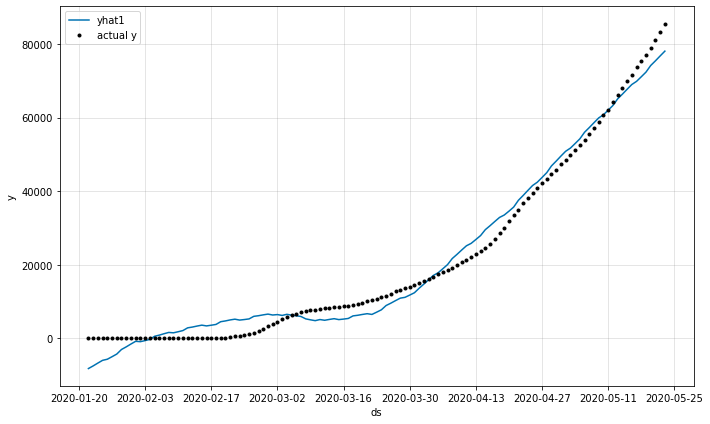

In [30]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

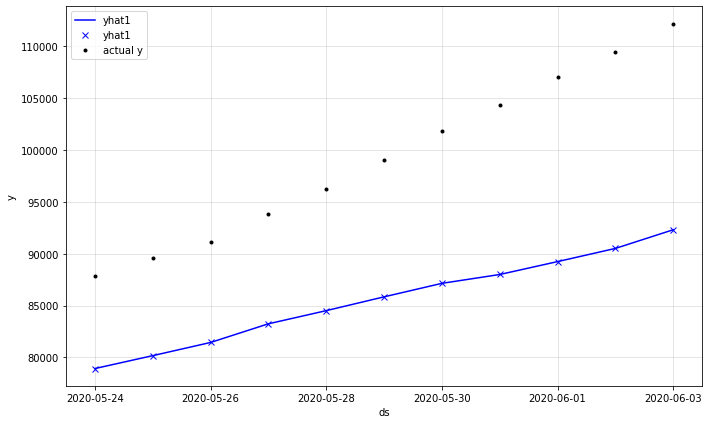

In [31]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

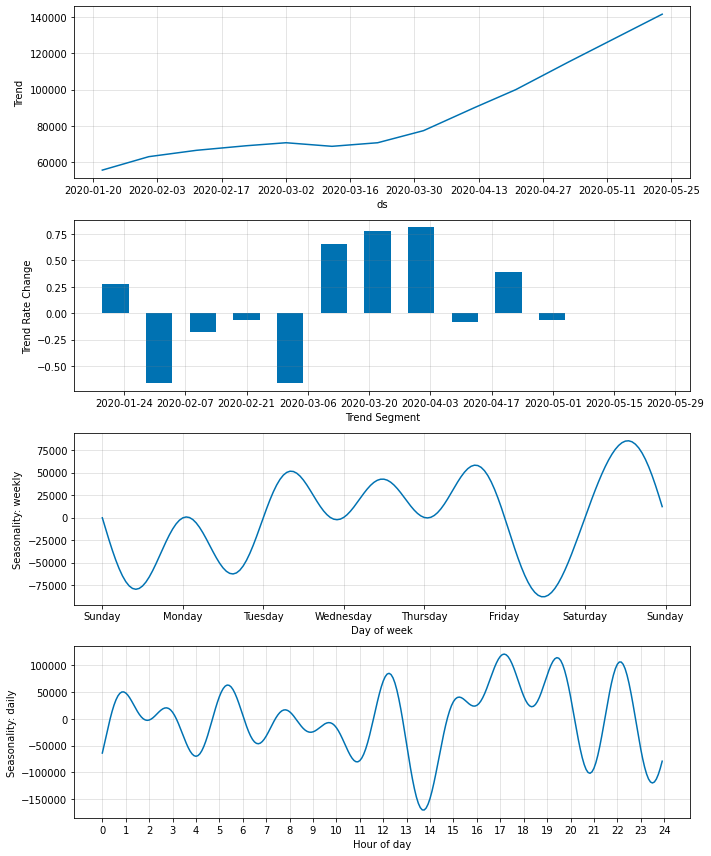

In [32]:
fig_param = m.plot_parameters()